In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# The mechanism of K-means

<b>Idea:</b> Decide a sample belongs to a group if the distance between centroid of that group and sample is nearest 

<b>Loss function:</b> $ L(Y,M) = \sum_{i=1}^N \sum_{j=1}^K y_{ij}{\lVert x_i - m_j\rVert}^2_2 $ <br>
With:
<b>Y</b> = $[y_1;y_2;...;y_n]$ as label of 

<b>Step by step:</b><br>
- Initialize all the center of clusters (K cluster, with K will be defined by user) 
- While the loss function not converged (or not having changes of member in clusters):
  - Assign all sample to their relevant clusters (the cluster will be chosen by the distance of their centroids and and the sample)
  - Recalculate the centroid (in this case, get mean of all samples of that cluster)

In [2]:
#Initilize data

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

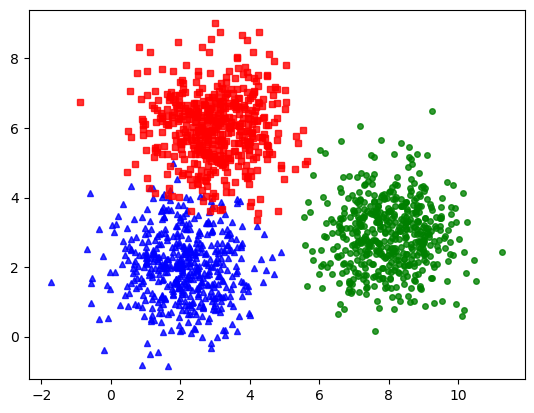

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

[[9.20072846 3.73677786]
 [7.34833025 1.76780855]
 [4.2136128  6.20491193]]
[[8.58860859 3.49682449]
 [5.71202993 1.84483347]
 [2.51272288 4.53111948]]
[[8.29912257 3.08845711]
 [4.74129391 1.62859108]
 [2.45236764 4.37687399]]
[[8.1086508  2.97535993]
 [3.10612527 1.40958655]
 [2.4785809  4.75611924]]
[[8.0056159  2.9242247 ]
 [2.15629437 1.70173191]
 [2.7921985  5.62584935]]
[[8.00087783 2.92129279]
 [2.07188738 1.91374884]
 [2.94078877 5.91328783]]
[[8.00485079 2.91641467]
 [2.07477614 1.98545922]
 [2.97501645 5.98430869]]
[[8.00485079 2.91641467]
 [2.07353144 2.01841915]
 [2.99076947 6.01525234]]
Centers found by our algorithm:
[[8.00485079 2.91641467]
 [2.07353144 2.01841915]
 [2.99076947 6.01525234]]


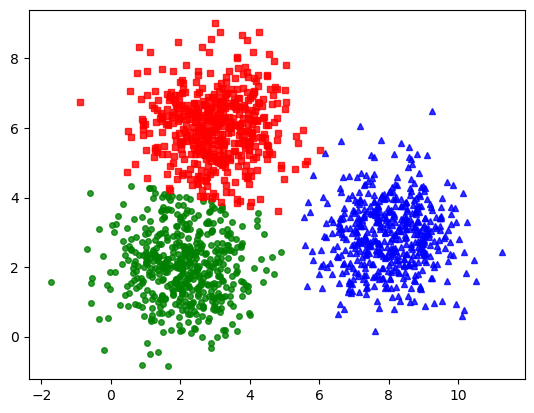

In [4]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    #The metric dist(u=XA[i], v=XB[j]) is computed and stored in the ij-th entry
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))


def kmeans(X, K):
    centers = kmeans_init_centers(X, K)
    labels = []
    it = 0 
    while True:
        labels = kmeans_assign_labels(X, centers)
        new_centers = kmeans_update_centers(X, labels, K)
        print(centers)
        if has_converged(centers, new_centers):
            break
        centers = new_centers
        it += 1
    return (centers, labels, it)


(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers)

kmeans_display(X, labels)

# Run by SKLearn

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=3,random_state=0).fit(X)
model.cluster_centers_

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([[8.00485079, 2.91641467],
       [2.99076947, 6.01525234],
       [2.07353144, 2.01841915]])



# Example with image applications

In [7]:
!pip install wget
!pip install python-mnist
!mkdir data
import wget
import os
from mnist import MNIST
import gzip
import shutil

download_link = ["http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz","http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", \
"http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz","http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"]

for link in download_link:
    filePath_extract = link.split("/")[-1].replace(".gz","")
    filePath_compress = link.split("/")[-1]
    if(os.path.exists(os.path.join(os.getcwd(),filePath_extract))):
        continue
    else:
        wget.download(link)
        with gzip.open(filePath_compress, 'rb') as file_in:
            with open(filePath_extract, 'wb') as file_out:
                shutil.copyfileobj(file_in, file_out)
        
    
    

    


A subdirectory or file data already exists.


In [ ]:

from mnist import MNIST
mnist_data = MNIST(os.getcwd())
mnist_data.load_testing()
X = mnist_data.test_images
Y = mnist_data.test_labels
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

kmeans = KMeans(n_clusters=10).fit(X)
pred_label = kmeans.predict(X)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [ ]:
plt.imshow(X0[2].reshape(-1,28))
plt.show()

In [ ]:
pred_label[2]

In [ ]:
pred_label

In [ ]:
plt.imshow(X0[5].reshape(-1,28))
plt.show()

In [ ]:
pred_label[5]